In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_img,train_lb),(test_img,test_lb)=fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
print(np.shape(train_img))
len(train_img)

(60000, 28, 28)


60000

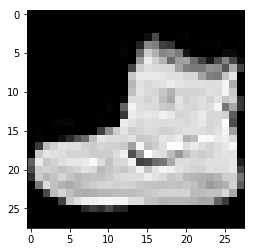

In [4]:
i=0
plt.imshow(train_img[i],'gray')

In [5]:
#Normalizar os valores para ficarem entre 0 e 1

train_img=train_img/255.0
test_img=test_img/255.0

In [6]:
input_layer=tf.keras.layers.Flatten(input_shape=(28,28))
hidden_1=tf.keras.layers.Dense(150,activation=tf.nn.relu)
hidden_2=tf.keras.layers.Dense(70,activation=tf.nn.relu)
hidden_3=tf.keras.layers.Dense(20,activation=tf.nn.relu)
output_layer=tf.keras.layers.Dense(10,activation=tf.nn.softmax)


model=tf.keras.Sequential([input_layer,hidden_1,hidden_2,hidden_3,output_layer])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(train_img,train_lb,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 17s 278us/sample - loss: 0.5266 - acc: 0.8137
Epoch 2/10
60000/60000 [==============================] - 16s 258us/sample - loss: 0.3705 - acc: 0.8658
Epoch 3/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.3384 - acc: 0.8766
Epoch 4/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.3139 - acc: 0.8855
Epoch 5/10
60000/60000 [==============================] - 15s 253us/sample - loss: 0.2960 - acc: 0.8904
Epoch 6/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.2811 - acc: 0.8947
Epoch 7/10
60000/60000 [==============================] - 16s 263us/sample - loss: 0.2727 - acc: 0.8987
Epoch 8/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.2606 - acc: 0.9032
Epoch 9/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.2515 - acc: 0.9061
Epoch 10/10
60000/60000 [==============================] - 16s 2

In [9]:
(test_loss,test_acc)=model.evaluate(test_img,test_lb)
print('Test acc: ',test_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3399 - acc: 0.8806
Test acc:  0.8806


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 70)                10570     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1420      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 129,950
Trainable params: 129,950
Non-trainable params: 0
_________________________________________________________________


Ankle boot  ----->  Ankle boot


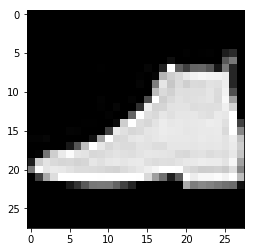

In [11]:
index=randint(0,10000)
prediction=model.predict(test_img)
ans=np.argmax(prediction[index])
print(class_names[ans],' -----> ',class_names[test_lb[index]])
plt.imshow(test_img[index],'gray')

In [12]:
model.layers

In [13]:
model.inputs

[<tf.Tensor 'flatten_input:0' shape=(?, 28, 28) dtype=float32>]

In [14]:
model.outputs

[<tf.Tensor 'dense_3/Softmax:0' shape=(?, 10) dtype=float32>]